# Fuentes de Analisis

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carga de datos (csv)
Se cargan la base de datos (CSV) para trabajar con estos

In [7]:
direccionTrain = '../apartments_for_rent_classified_10K.csv'
data_original = pd.read_csv(direccionTrain, sep=';', encoding='latin1')
data_original.shape

(10000, 22)

# 2. Entendimientos de los datos

### 2.0 Descripciones Basicas de la variable objetivo y de las demas variables

Histograma de la variable objetivo Price

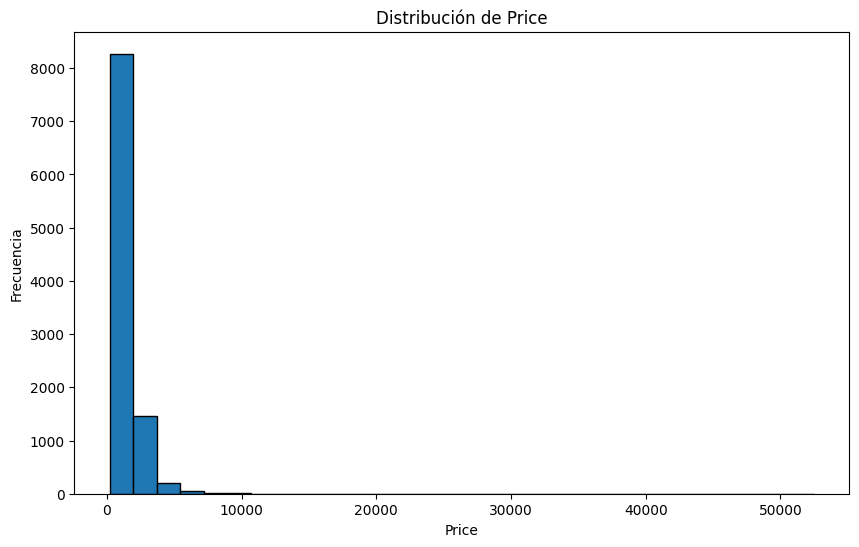

count    10000.000000
mean      1486.277500
std       1076.507968
min        200.000000
25%        949.000000
50%       1270.000000
75%       1695.000000
max      52500.000000
Name: price, dtype: float64

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(data_original['price'], bins=30, edgecolor='k')
plt.title('Distribución de Price')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.show()
data_original['price'].describe()

Datos basicos de las variables numericas

In [9]:
data_original.describe()


,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,1.000000e+04,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9990.000000,1.000000e+04
mean,5.623396e+09,1.380544,1.744021,1486.277500,945.810500,37.695162,-94.652247,1.574891e+09
std,7.021025e+07,0.615410,0.942354,1076.507968,655.755736,5.495851,15.759805,3.762395e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,33.679850,-101.301700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1270.000000,802.000000,38.809800,-93.651600,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.209975,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.594000,-70.191600,1.577362e+09


### 2.1 Datos Nulos

Como se puede observar El análisis muestra que varias columnas tienen valores nulos, destacando `amenities`, `pets_allowed` y `address` con una cantidad significativa. Otras columnas tienen pocos valores faltantes, mientras que la mayoría está completa, lo que facilita el análisis general.

In [10]:
features = data_original.columns
data_original[features].isnull().sum() 

id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     4163
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64

El análisis porcentual muestra que las columnas `amenities`, `pets_allowed` y `address` tienen los mayores porcentajes de valores nulos (35.49 %, 41.63 % y 33.27 %, respectivamente). Las demás columnas tienen porcentajes insignificantes de datos faltantes, facilitando su uso para análisis más detallados.

In [11]:
data_original[features].isnull().sum() /data_original.shape[0] * 100

id                0.00
category          0.00
title             0.00
body              0.00
amenities        35.49
bathrooms         0.34
bedrooms          0.07
currency          0.00
fee               0.00
has_photo         0.00
pets_allowed     41.63
price             0.00
price_display     0.00
price_type        0.00
square_feet       0.00
address          33.27
cityname          0.77
state             0.77
latitude          0.10
longitude         0.10
source            0.00
time              0.00
dtype: float64

### 2.2 Graficas de disperción de las variables continuas

Como se puede observar en las graficas de disperción las variables square_feed muestra una relacion algo incremental pero con aleatoriedad, por otro lado, latitud y longitud muestran tambien una disperción aleatoria. Por otro lado las variables id y time muestran una dispercion similar, lo que puede ocasionar correlacion entre estos mas adelante, esto puede suceder si el id se creo con respecto al tiempo de creación, lo cual suele ser normal.

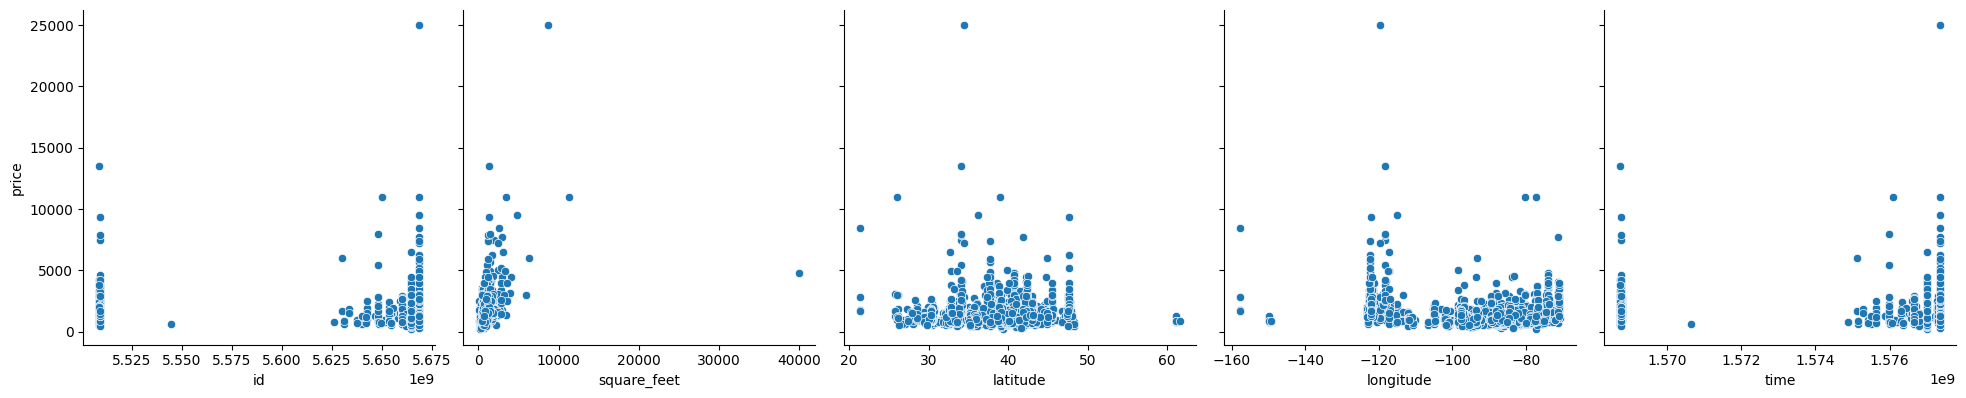

In [12]:
numerical_columns = data_original.select_dtypes(include=[np.number]).columns
numerical_columns = numerical_columns.drop(['bathrooms', 'bedrooms', 'price'])
sns.pairplot(data_original.sample(frac=0.2), height=4, y_vars="price", x_vars=numerical_columns, kind="scatter")

### 2.3 Histogramas para variables continuas

Como se puede observar en los histogramas de id y time tienen una distribucion similar con valores en extremos y no acumulados en una media. Por otro lado, el tamaño del piso muestra una distribucion acumulada en una media de 945, sin embargo, tiene valores extremos que pueden alterar su grafica ya que tiene un valor maximo de 40000 que puede ser un outlier. Por ultimo, la distribución de latitud y longitud muestran una distribucion aleatorias sin rasgos fuera de lo común.

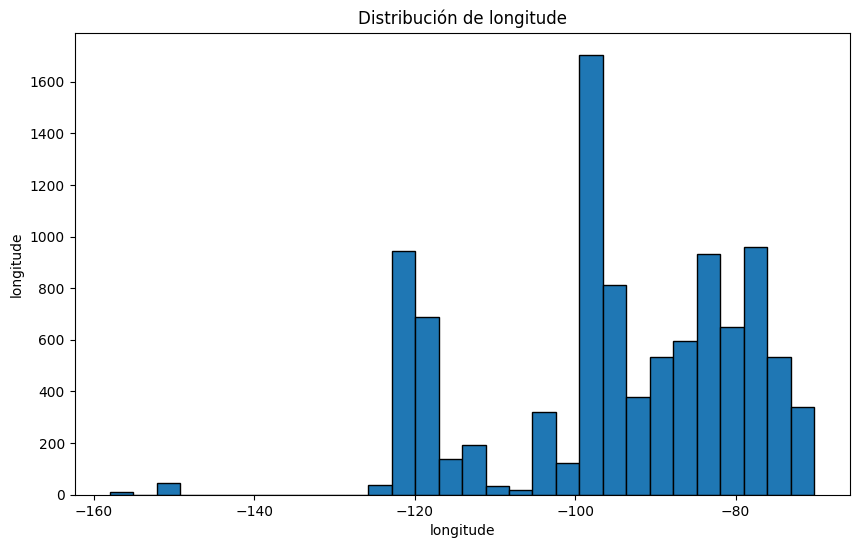

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(data_original['longitude'], bins=30, edgecolor='k')
plt.title('Distribución de longitude')
plt.xlabel('longitude')
plt.ylabel('longitude')
plt.show()

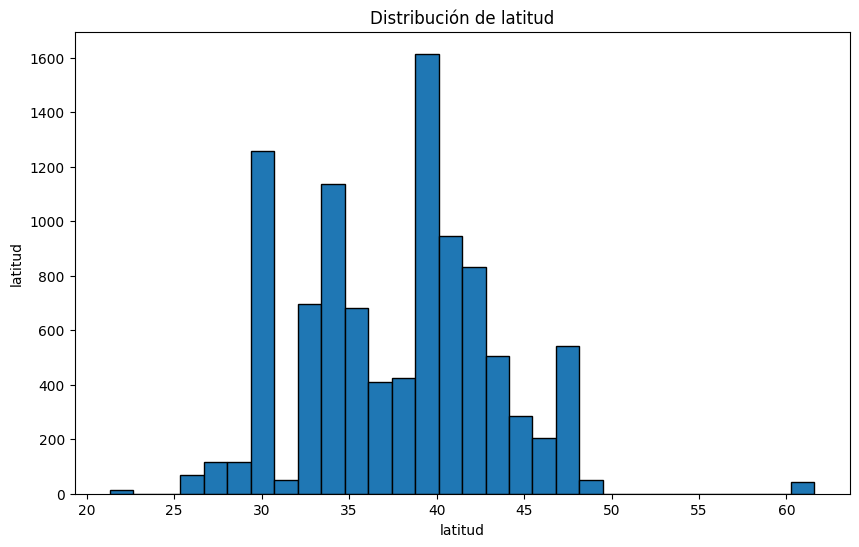

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(data_original['latitude'], bins=30, edgecolor='k')
plt.title('Distribución de latitud')
plt.xlabel('latitud')
plt.ylabel('latitud')
plt.show()

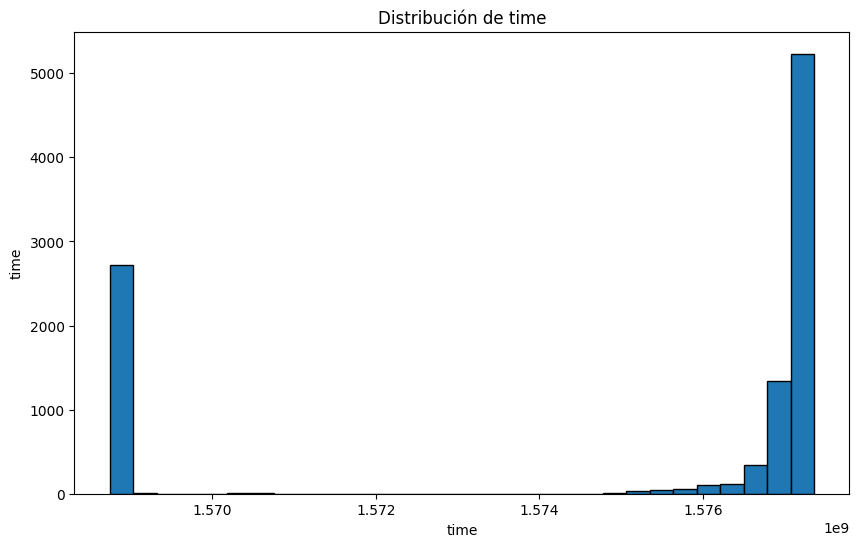

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(data_original['time'], bins=30, edgecolor='k')
plt.title('Distribución de time')
plt.xlabel('time')
plt.ylabel('time')
plt.show()

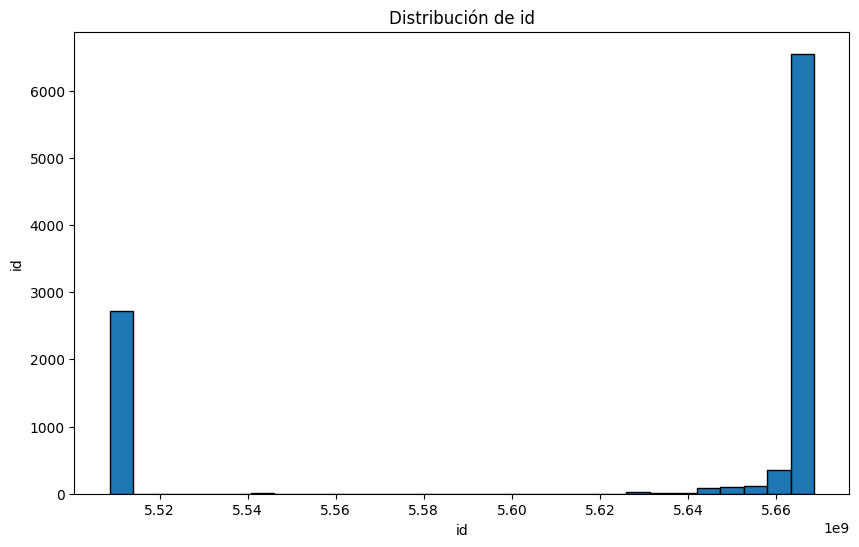

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(data_original['id'], bins=30, edgecolor='k')
plt.title('Distribución de id')
plt.xlabel('id')
plt.ylabel('id')
plt.show()

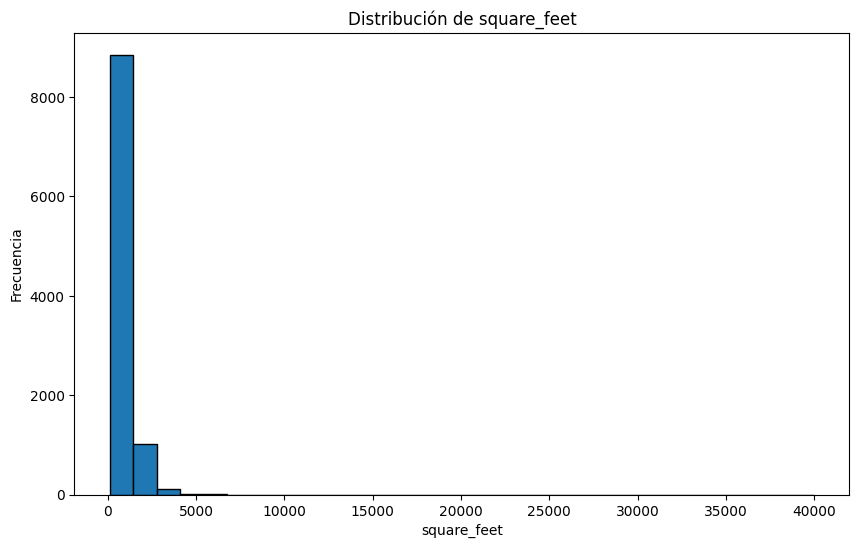

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(data_original['square_feet'], bins=30, edgecolor='k')
plt.title('Distribución de square_feet')
plt.xlabel('square_feet')
plt.ylabel('Frecuencia')
plt.show()

In [18]:
print(data_original[numerical_columns].describe())

                 id   square_feet     latitude    longitude          time
count  1.000000e+04  10000.000000  9990.000000  9990.000000  1.000000e+04
mean   5.623396e+09    945.810500    37.695162   -94.652247  1.574891e+09
std    7.021025e+07    655.755736     5.495851    15.759805  3.762395e+06
min    5.508654e+09    101.000000    21.315500  -158.022100  1.568744e+09
25%    5.509248e+09    649.000000    33.679850  -101.301700  1.568781e+09
50%    5.668610e+09    802.000000    38.809800   -93.651600  1.577358e+09
75%    5.668626e+09   1100.000000    41.349800   -82.209975  1.577359e+09
max    5.668663e+09  40000.000000    61.594000   -70.191600  1.577362e+09


### 2.3 BoxPlot para variables categoricas

Para graficar las variables categoricas primero se filtran los datos para obtener estas variables contando la cantidad de valores unicos por variable y filtrandola por maximo 52 valores unicos que es el mayor caso que es el del estado donde se encuentra el apartamento

In [19]:
category_counts = data_original.nunique()
categorical_columns_filtered = category_counts[category_counts < 52].index
categorical_columns_filtered

Index(['category', 'bathrooms', 'bedrooms', 'currency', 'fee', 'has_photo',
       'pets_allowed', 'price_type', 'state', 'source'],
      dtype='object')

Como se puede Observar en los BoxPLot hay algunas variables que tienen una sola categoria, por lo que estas variables son obsoletas para nuestro modelo. Por otro lado, las otras variables tienen una distribución mas aleatoria que no muestran un patron claro, sin embargo, la cantidad de baños y cuartos si muestran una relacion creciente con respecto al precio.

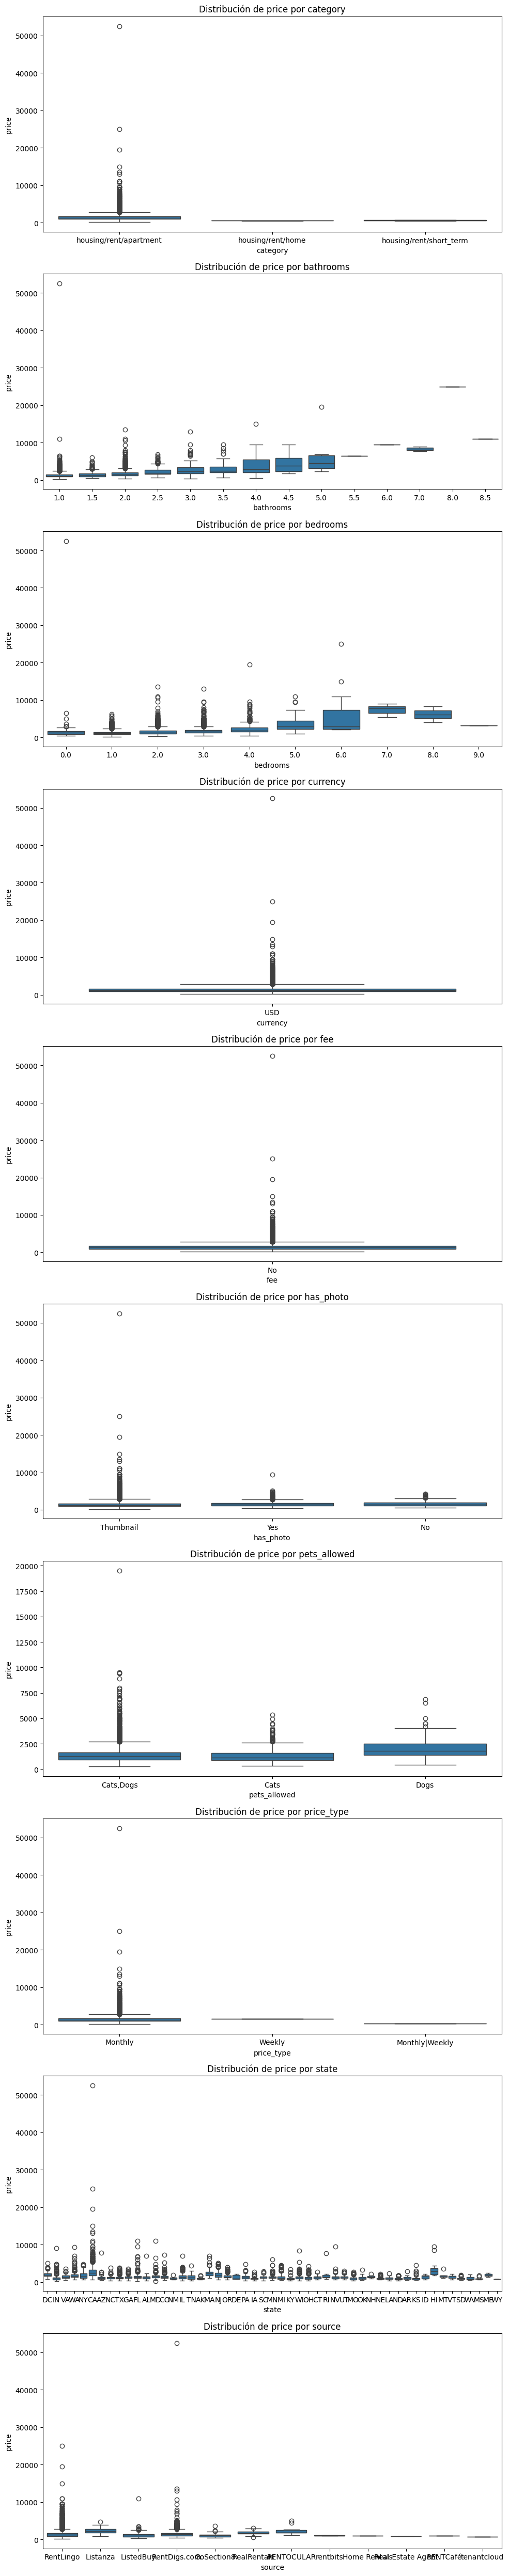

In [20]:
fig, axes = plt.subplots(nrows=len(categorical_columns_filtered), ncols=1, figsize=(10, 5 * len(categorical_columns_filtered)))

for ax, feature in zip(axes, categorical_columns_filtered):
    sns.boxplot(data=data_original, x=feature, y="price", ax=ax)
    ax.set_title(f"Distribución de price por {feature}")

plt.tight_layout()
plt.show()

### Matriz de Correlaciones

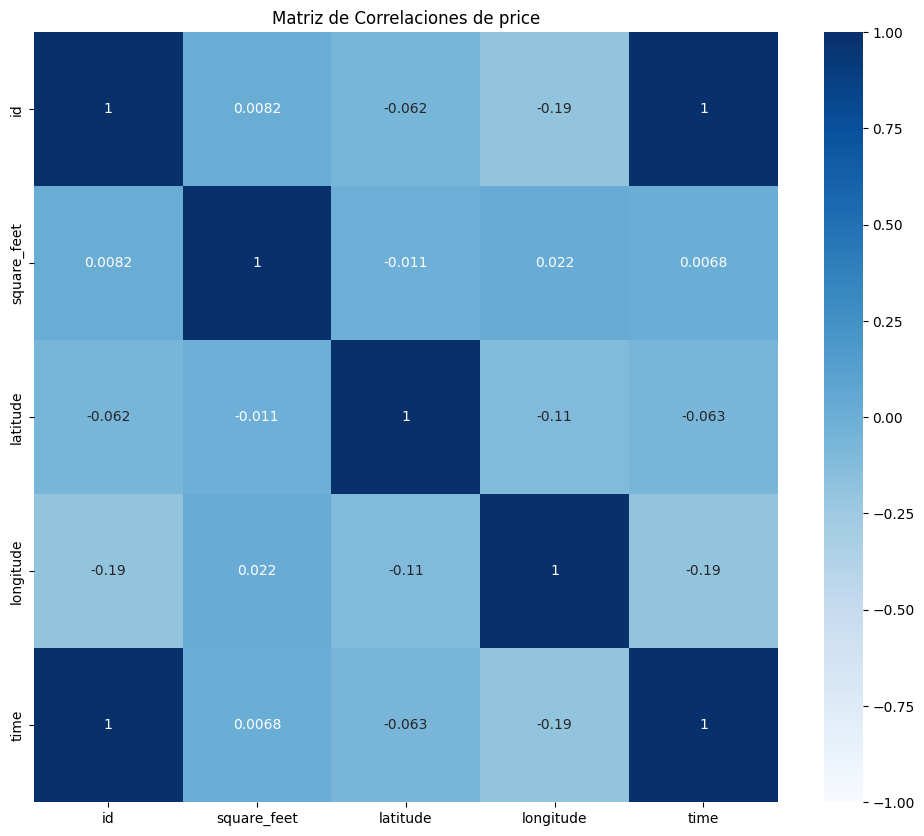

In [21]:
numerical_columns = data_original.select_dtypes(include=[np.number]).columns
numerical_columns = numerical_columns.drop(['bathrooms', 'bedrooms', 'price'])
correlation_matrix = pd.DataFrame(data_original, columns=numerical_columns).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="Blues", vmin=-1, vmax=1, annot=True)
plt.title("Matriz de Correlaciones de price")
plt.show()